In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os
from tqdm import tqdm

#Images
image_dir = "Unlabeled/Cropped" 
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
print(f"Number of images: {len(image_files)}")

#CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))


Images: 17


  0%|                                                                                                          | 0/17 [00:00<?, ?it/s]

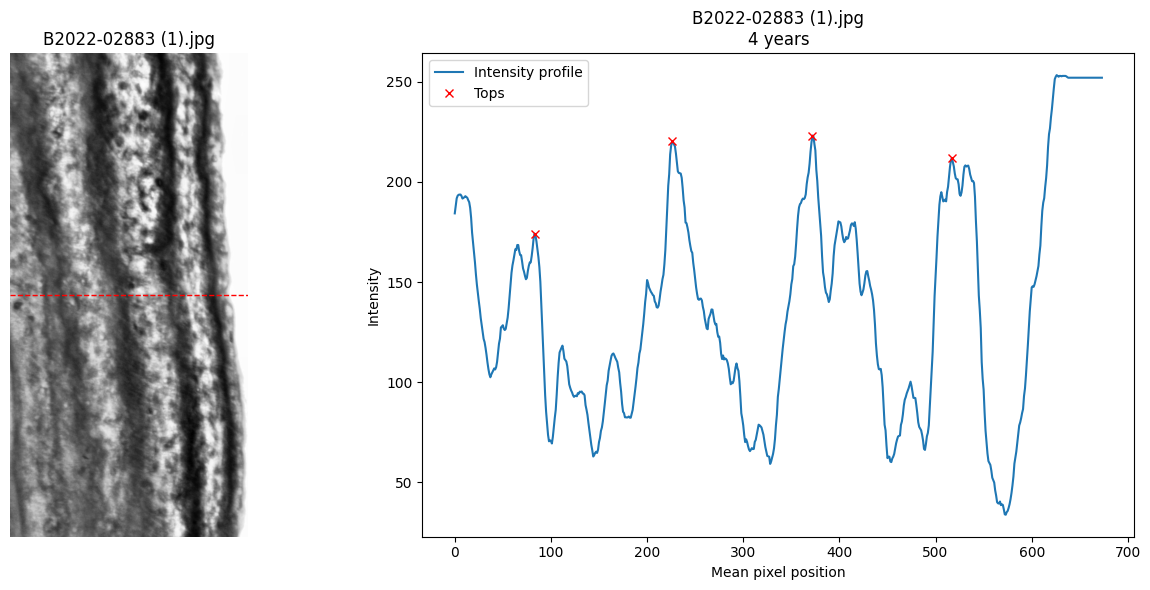

  6%|█████▊                                                                                            | 1/17 [00:00<00:08,  1.88it/s]

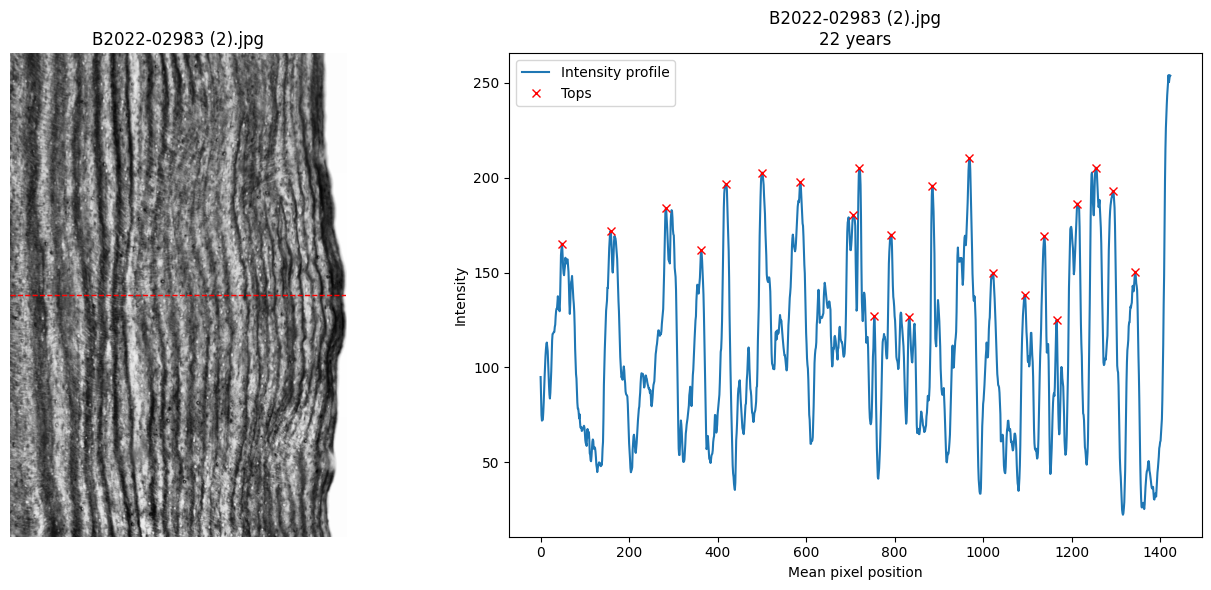

 12%|███████████▌                                                                                      | 2/17 [00:01<00:08,  1.68it/s]

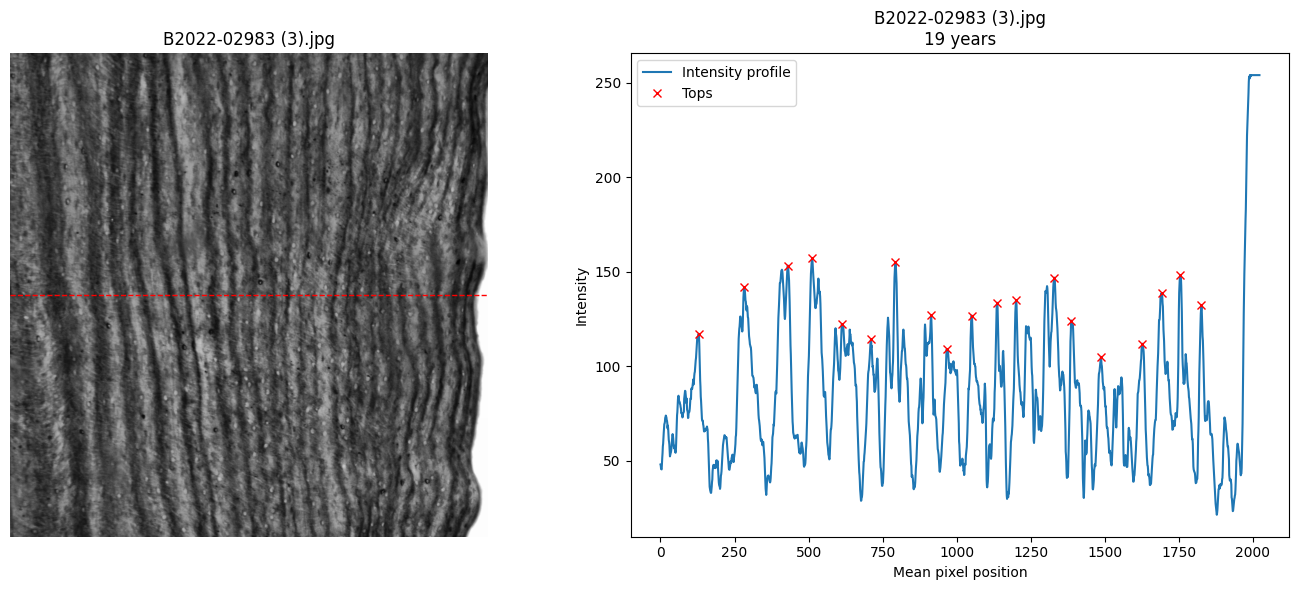

 18%|█████████████████▎                                                                                | 3/17 [00:01<00:09,  1.51it/s]

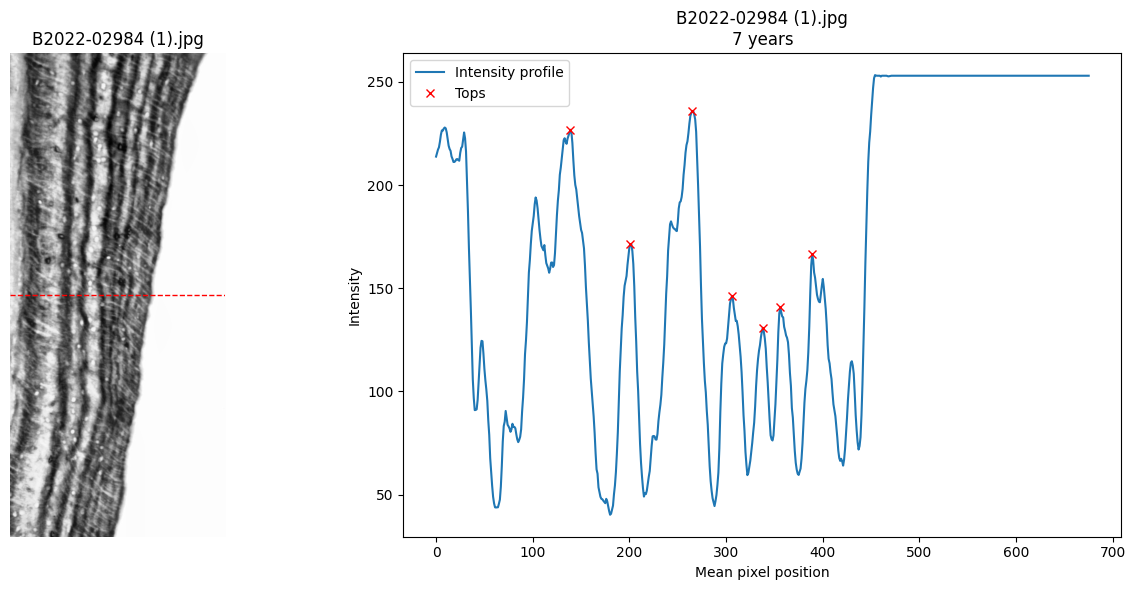

 24%|███████████████████████                                                                           | 4/17 [00:02<00:07,  1.67it/s]

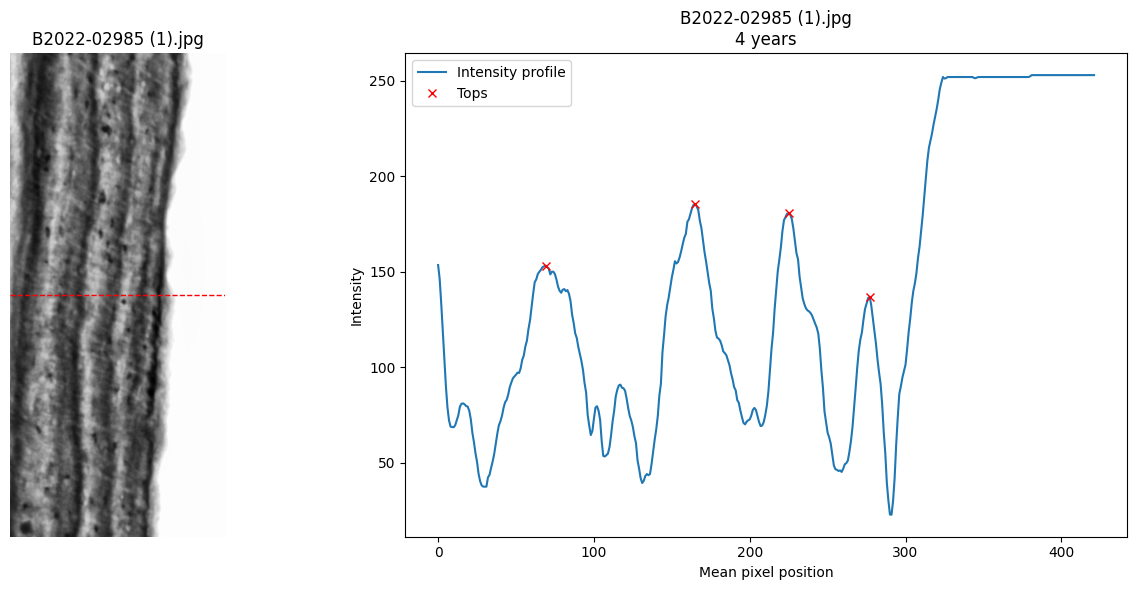

 29%|████████████████████████████▊                                                                     | 5/17 [00:02<00:06,  1.97it/s]

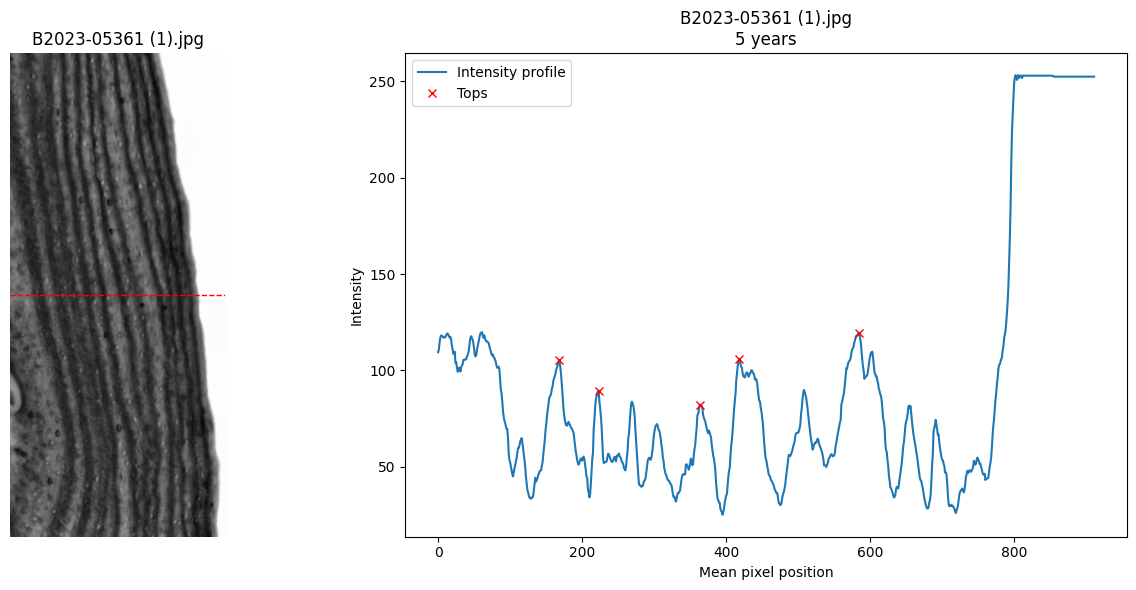

 35%|██████████████████████████████████▌                                                               | 6/17 [00:03<00:05,  2.06it/s]

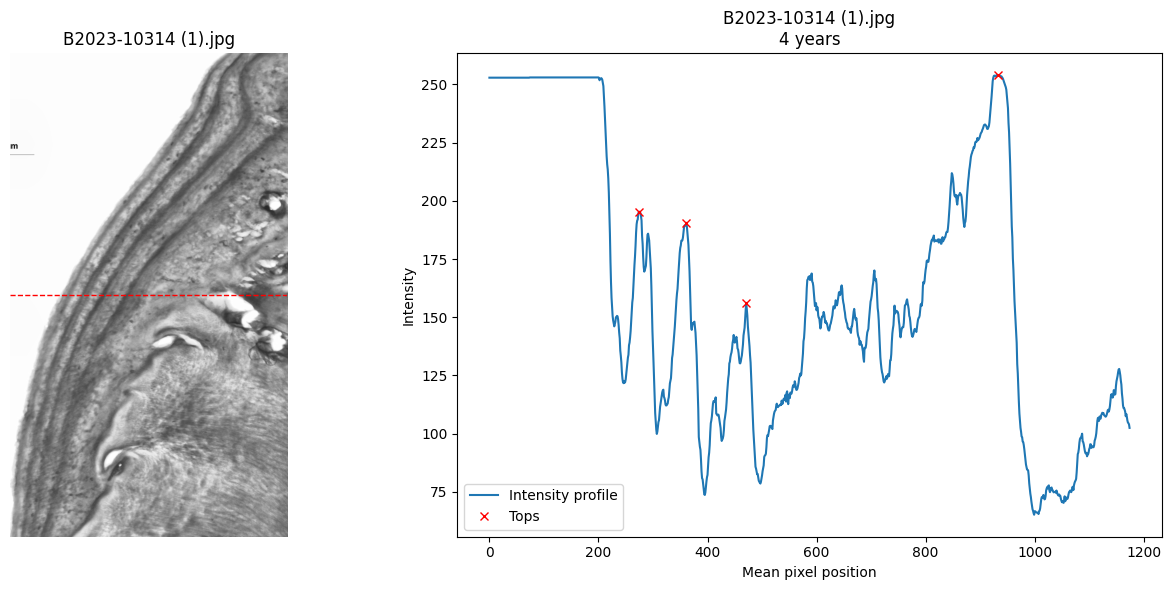

 41%|████████████████████████████████████████▎                                                         | 7/17 [00:03<00:05,  1.83it/s]

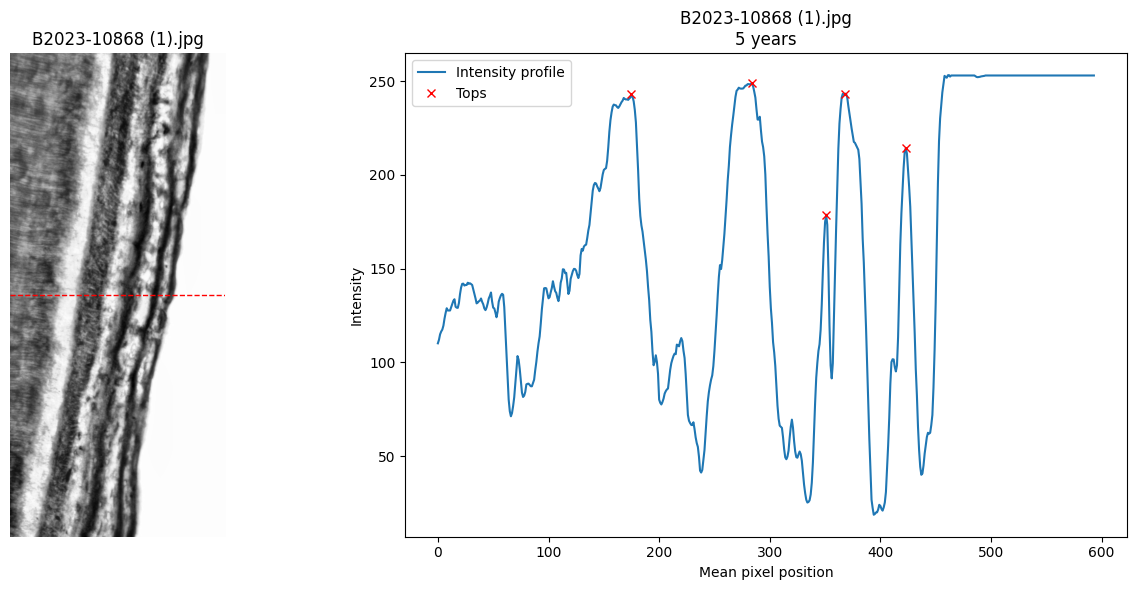

 47%|██████████████████████████████████████████████                                                    | 8/17 [00:04<00:04,  1.96it/s]

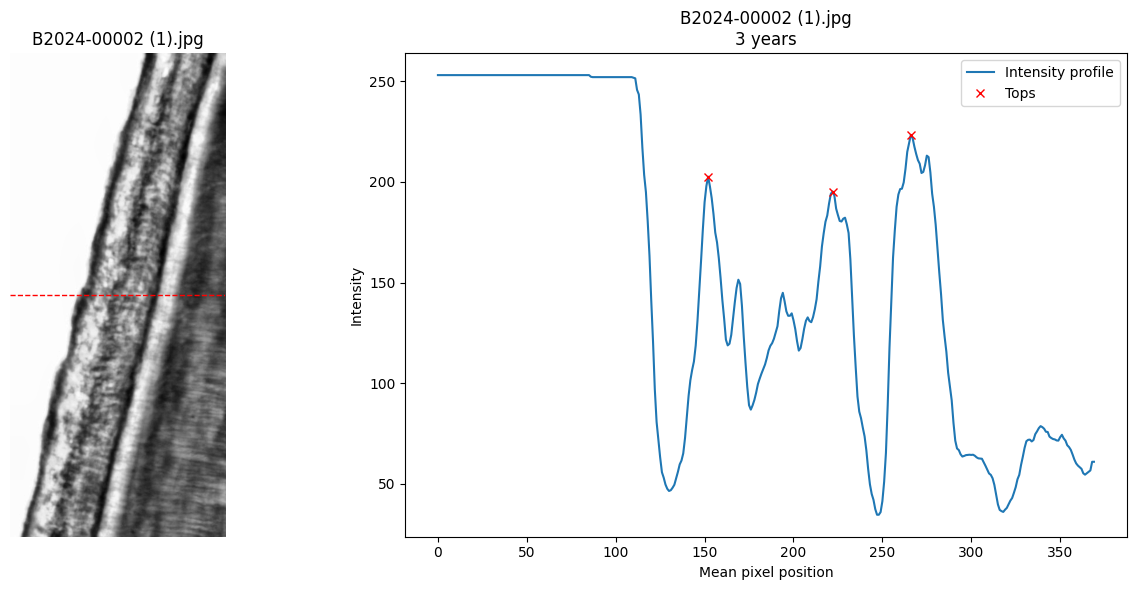

 53%|███████████████████████████████████████████████████▉                                              | 9/17 [00:04<00:03,  2.06it/s]

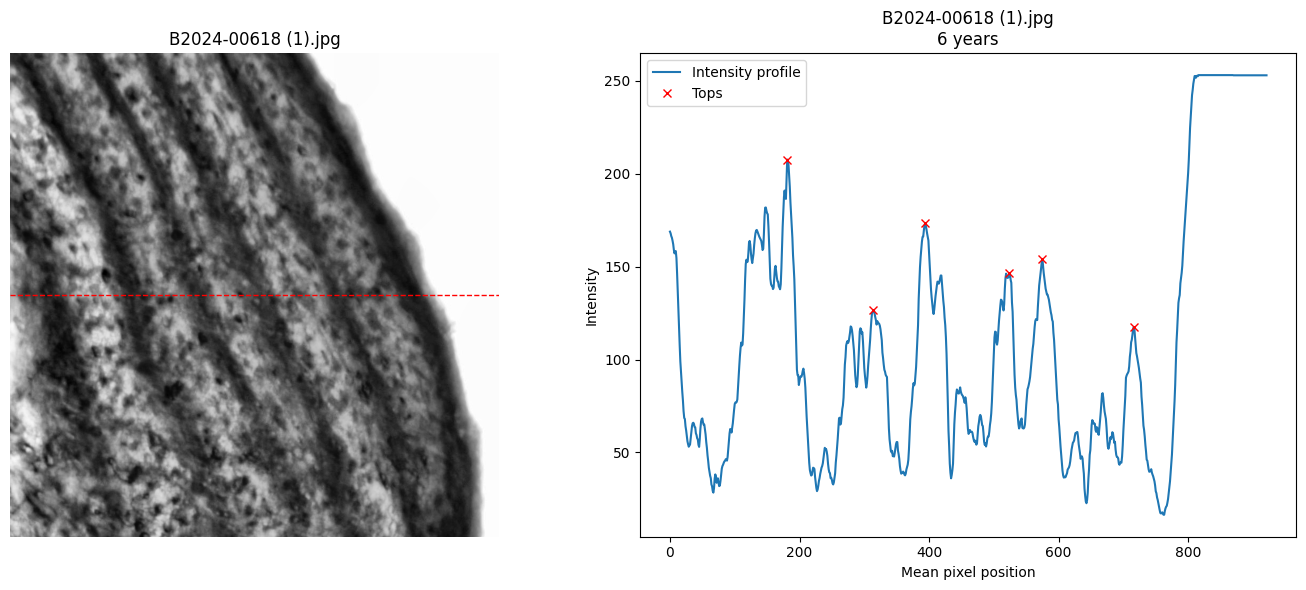

 59%|█████████████████████████████████████████████████████████                                        | 10/17 [00:05<00:03,  1.97it/s]

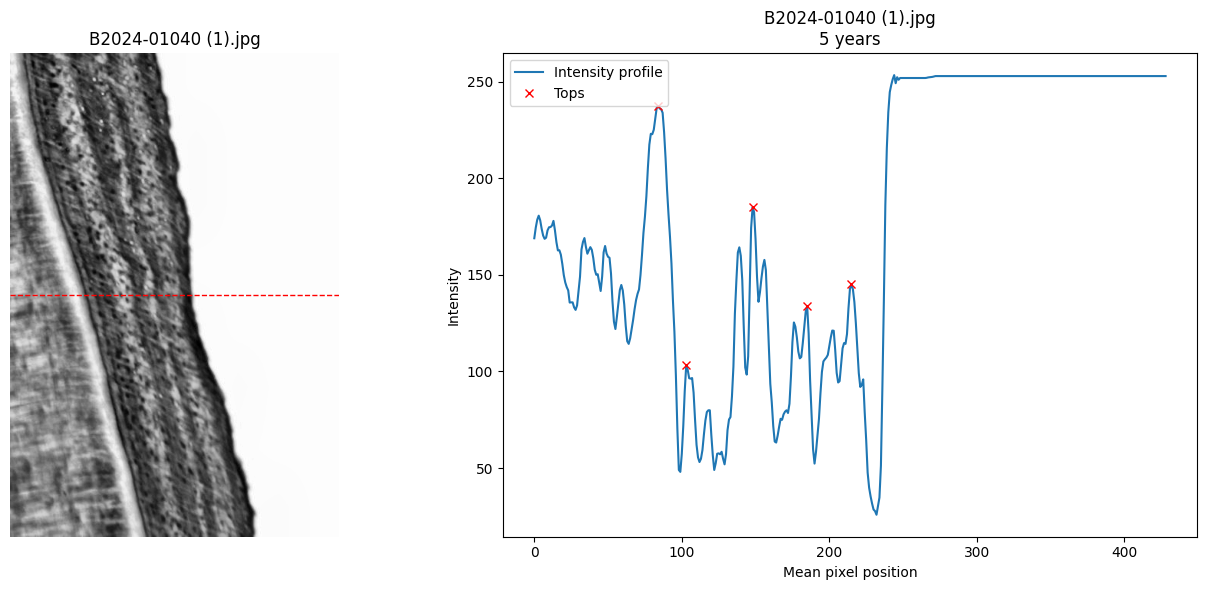

 65%|██████████████████████████████████████████████████████████████▊                                  | 11/17 [00:05<00:02,  2.20it/s]

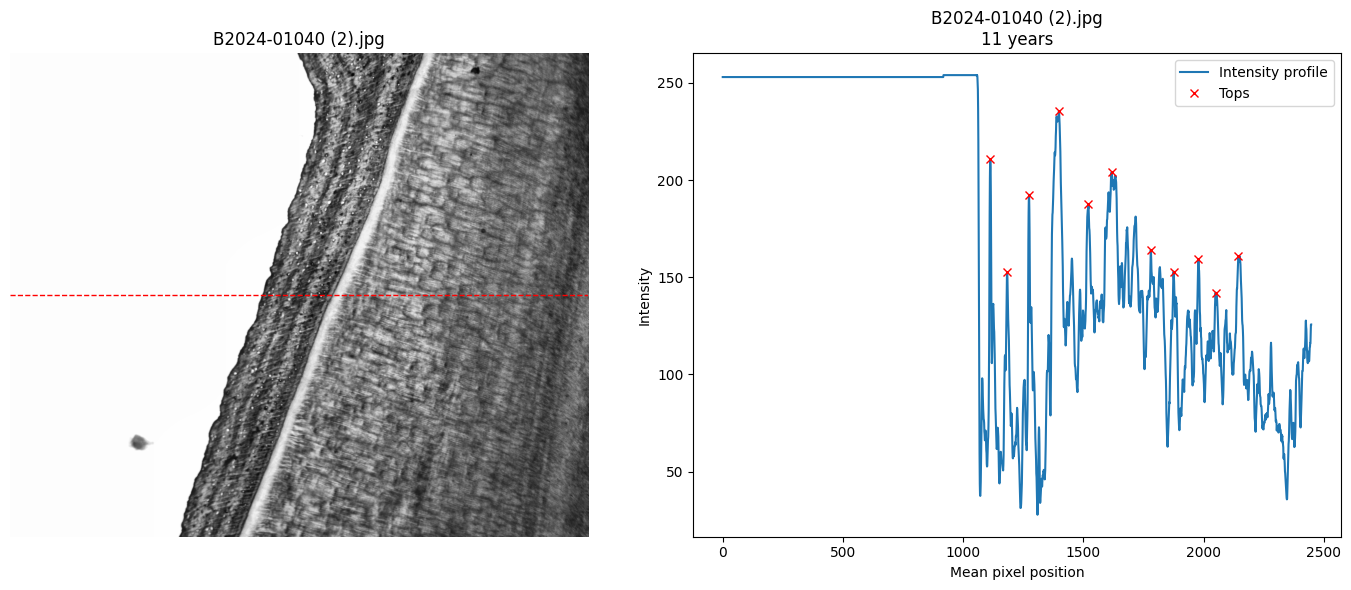

 71%|████████████████████████████████████████████████████████████████████▍                            | 12/17 [00:06<00:02,  1.70it/s]

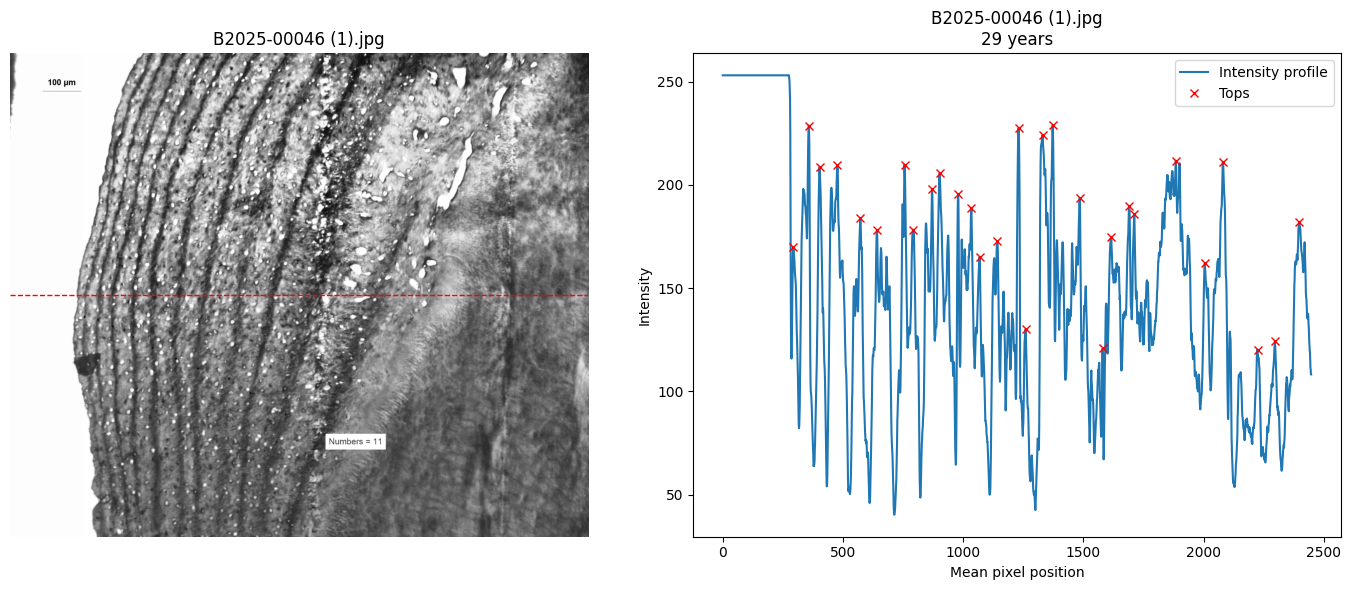

 76%|██████████████████████████████████████████████████████████████████████████▏                      | 13/17 [00:07<00:03,  1.27it/s]

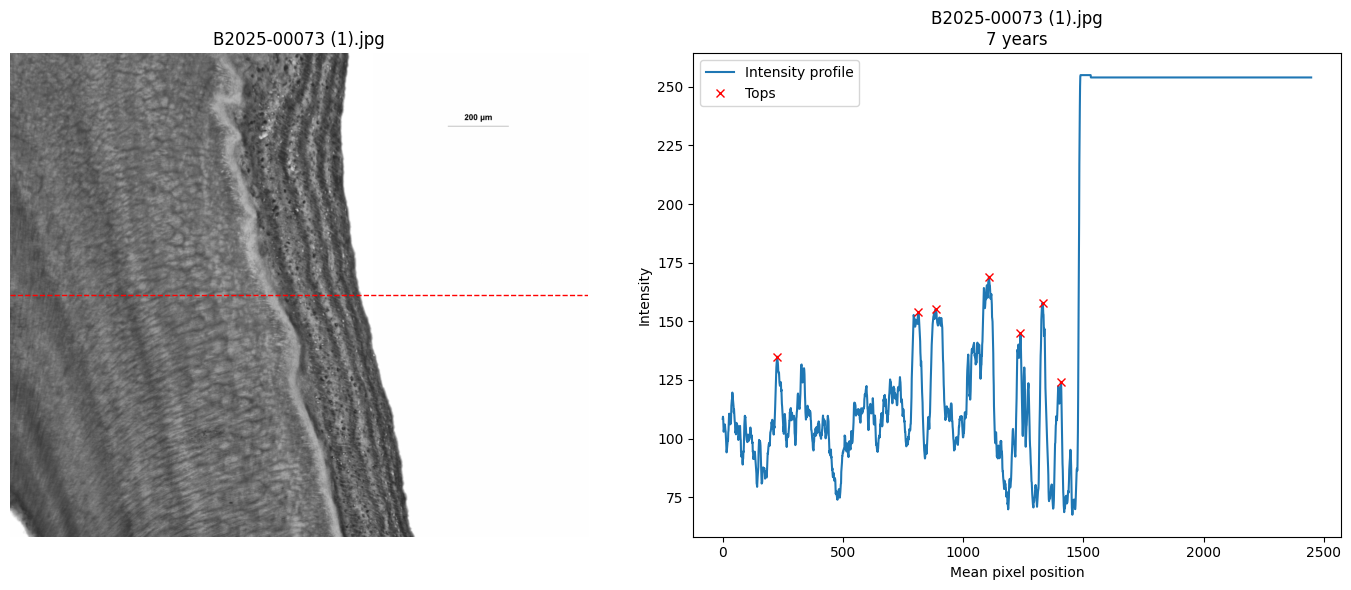

 82%|███████████████████████████████████████████████████████████████████████████████▉                 | 14/17 [00:08<00:02,  1.37it/s]

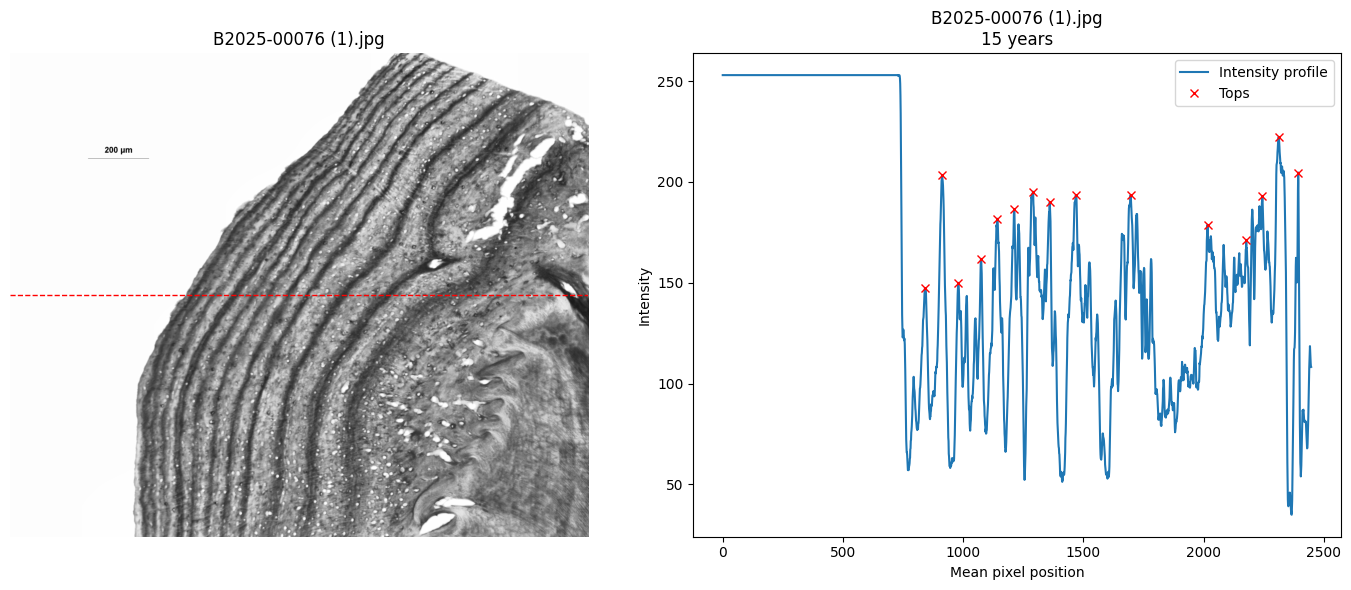

 88%|█████████████████████████████████████████████████████████████████████████████████████▌           | 15/17 [00:08<00:01,  1.43it/s]

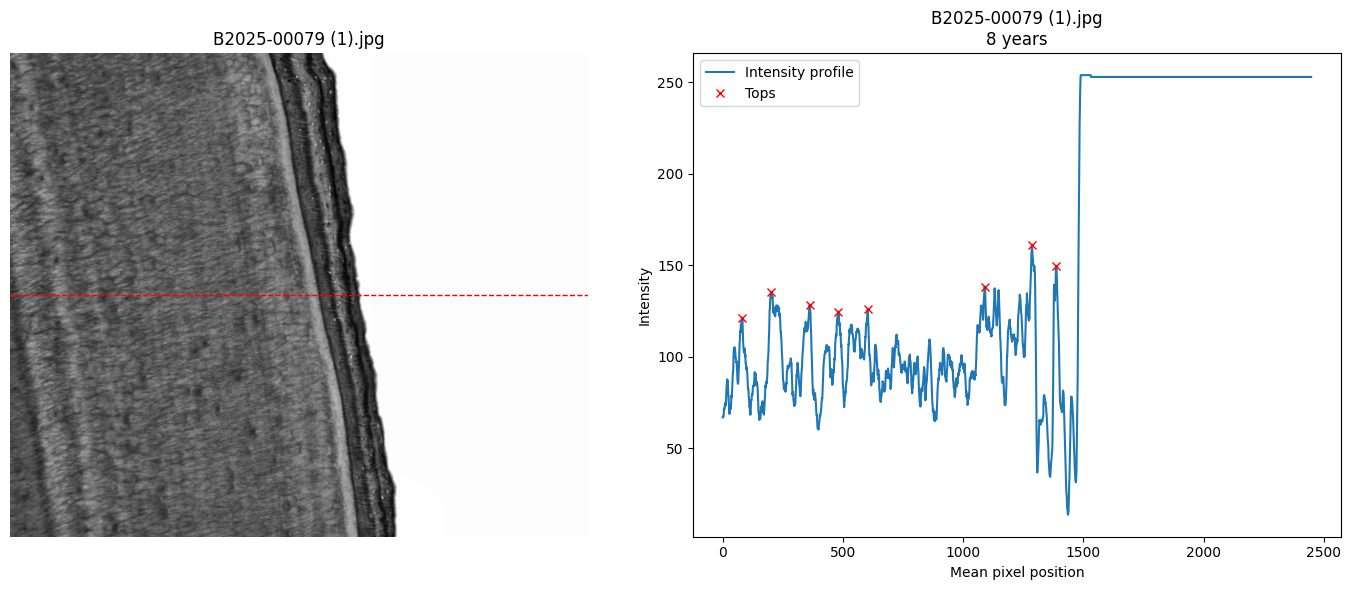

 94%|███████████████████████████████████████████████████████████████████████████████████████████▎     | 16/17 [00:09<00:00,  1.47it/s]

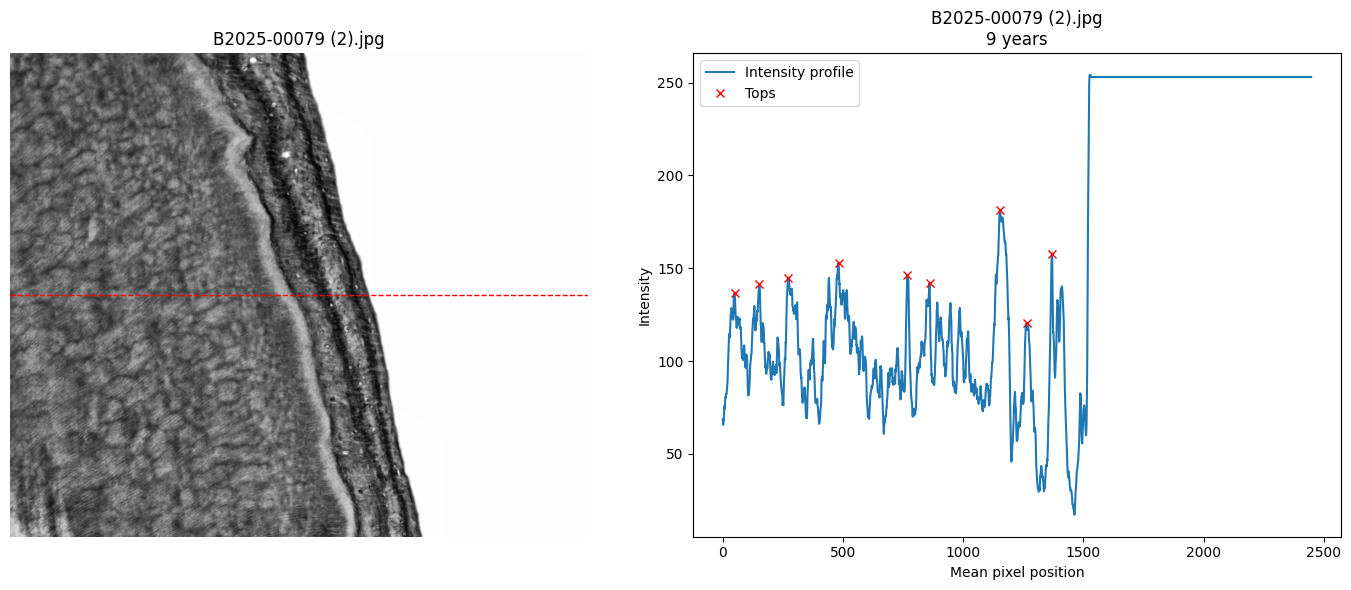

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:10<00:00,  1.66it/s]


In [97]:
for file in tqdm(image_files):
    img_path = os.path.join(image_dir, file)
    img = cv2.imread(img_path)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eq = clahe.apply(gray)
    norm = cv2.normalize(eq, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    #Intensity profile
    row_index = norm.shape[0] // 2
    profile = norm[row_index-5:row_index+5, :].mean(axis=0)

    #Find peaks
    peaks, _ = find_peaks(profile, distance=10, prominence=50)
    if len(peaks) > 1:
        period = np.mean(np.diff(peaks))
    else:
        period = np.nan

    #Graph and image
    plt.figure(figsize=(14, 6))
    
    #Image
    plt.subplot(1, 2, 1)
    plt.imshow(norm, cmap='gray')  
    plt.axhline(row_index, color='r', linestyle='--', linewidth=1) 
    plt.title(f"{file}")  
    plt.axis('off') 
    
    #Intensity profile
    plt.subplot(1, 2, 2)
    plt.plot(profile, label="Intensity profile") 
    if len(peaks) > 0:
        plt.plot(peaks, profile[peaks], "rx", label="Tops")  
    plt.title(f"{file}\n{len(peaks)} years")  
    plt.xlabel("Mean pixel position") 
    plt.ylabel("Intensity")
    plt.legend()
    plt.tight_layout()
    plt.show()
